RDMs: model + fMRI

In [32]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import torch
import torchvision 
import pandas as pd

In [34]:
def show_activation_layer_rdm(activation_layer, model, layer_name):
    df = pd.DataFrame(activation_layer)

    corr = df.corr()
    rdm = 1-corr
    rdm_numpy = rdm.to_numpy()
    rdm_torch = torch.from_numpy(rdm_numpy)
    torch.save(rdm_torch, '/content/gdrive/MyDrive/BIA/'+model+'_'+layer_name+'rdm.pth')

    d = sn.heatmap(rdm, annot=True)
    d.set_title(model + "_" + layer_name)
    #plt.savefig("/content/gdrive/MyDrive/BIA/model_rdm_images/"+model + "_" +layer_name + ".png")
    plt.savefig("/content/gdrive/MyDrive/BIA/fmri_rdm_images/"+model + "_" +layer_name + ".png")
    plt.show()

model_0_conv1
(5760, 10)


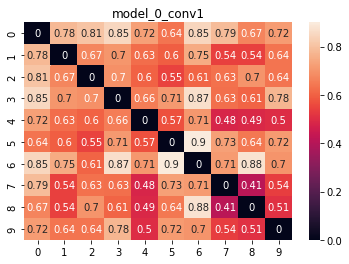

model_0_conv2
(1280, 10)


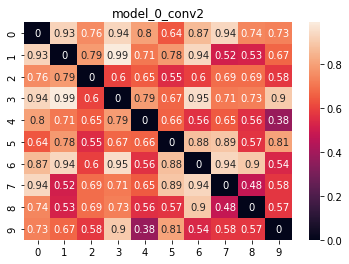

model_1_conv1
(5760, 10)


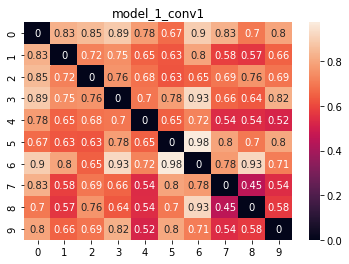

model_1_conv2
(1280, 10)


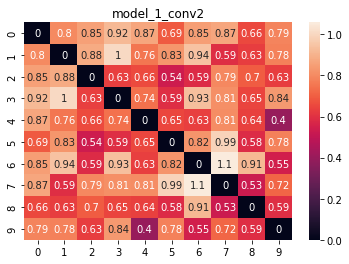

model_2_conv1
(5760, 10)


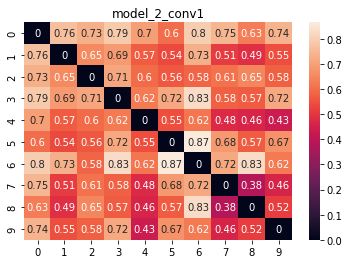

model_2_conv2
(1280, 10)


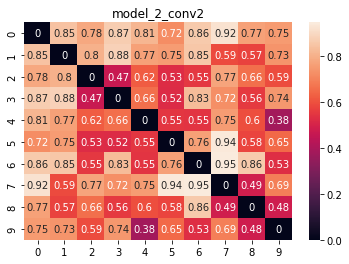

model_3_conv1
(5760, 10)


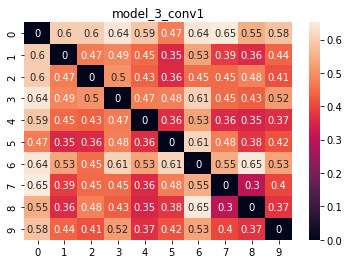

model_3_conv2
(1280, 10)


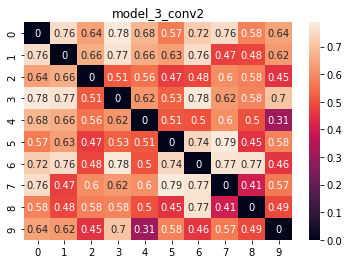

model_4_conv1
(5760, 10)


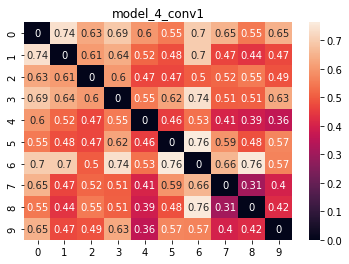

model_4_conv2
(1280, 10)


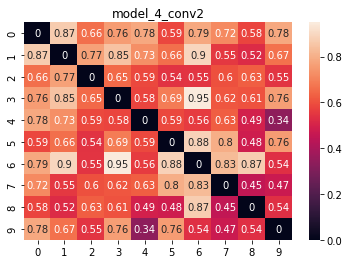

model_5_conv1
(5760, 10)


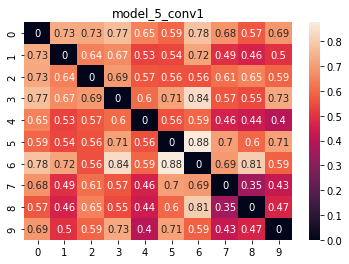

model_5_conv2
(1280, 10)


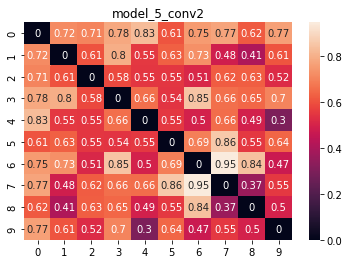

model_6_conv1
(5760, 10)


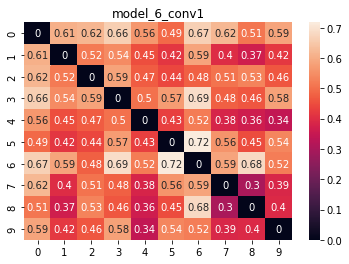

model_6_conv2
(1280, 10)


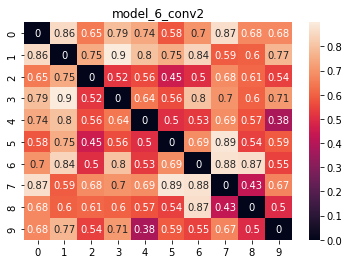

model_7_conv1
(5760, 10)


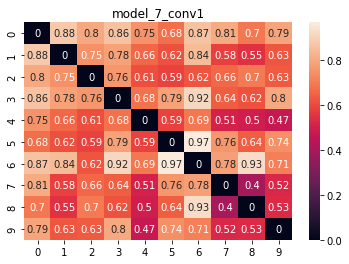

model_7_conv2
(1280, 10)


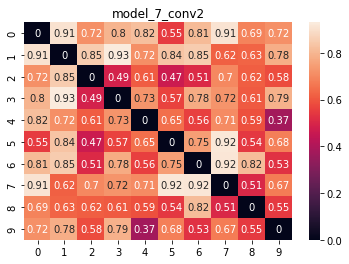

model_8_conv1
(5760, 10)


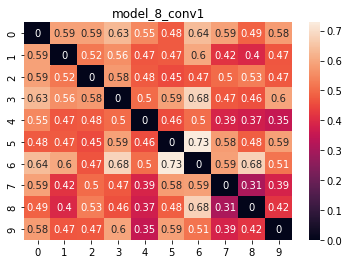

model_8_conv2
(1280, 10)


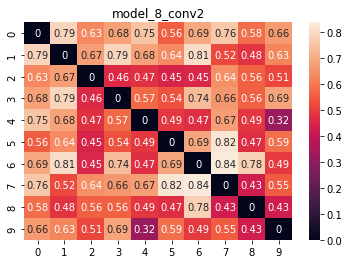

model_9_conv1
(5760, 10)


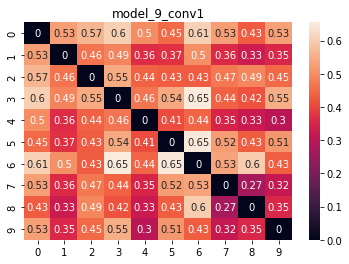

model_9_conv2
(1280, 10)


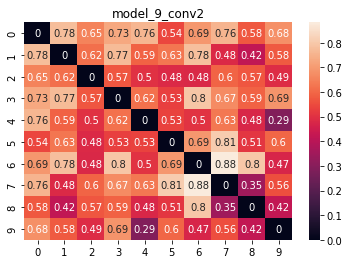

model_10_conv1
(5760, 10)


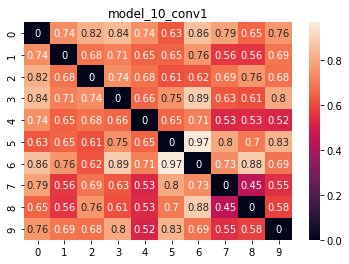

model_10_conv2
(1280, 10)


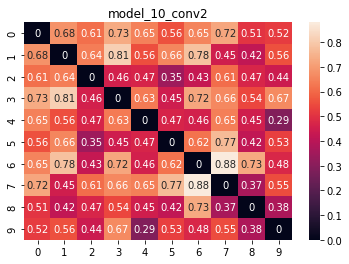

model_11_conv1
(5760, 10)


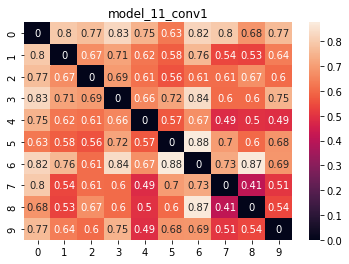

model_11_conv2
(1280, 10)


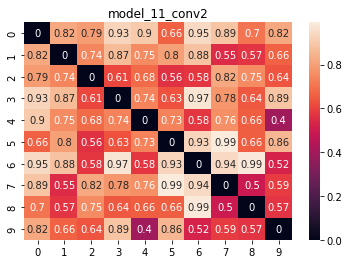

model_12_conv1
(5760, 10)


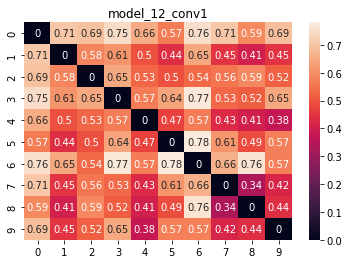

model_12_conv2
(1280, 10)


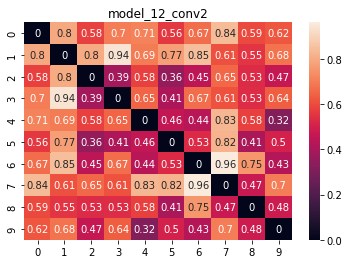

model_13_conv1
(5760, 10)


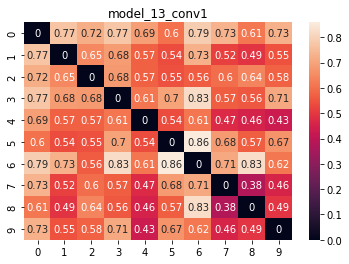

model_13_conv2
(1280, 10)


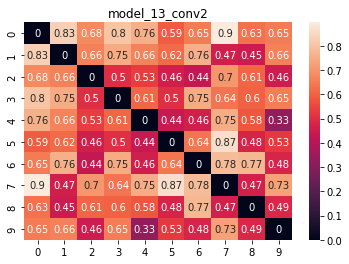

model_14_conv1
(5760, 10)


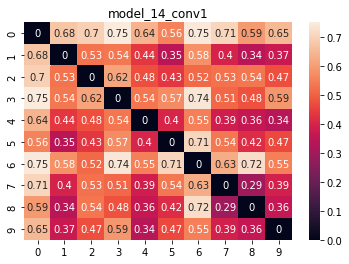

model_14_conv2
(1280, 10)


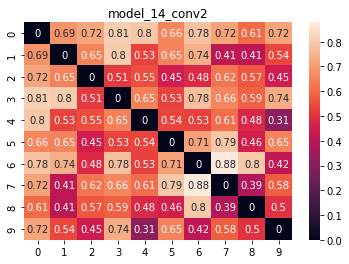

model_15_conv1
(5760, 10)


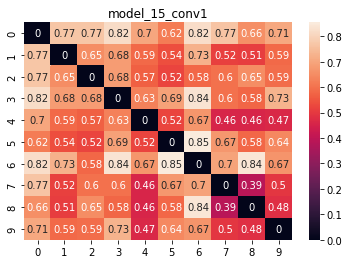

model_15_conv2
(1280, 10)


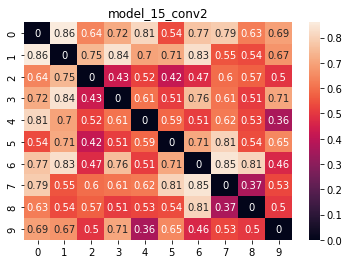

model_16_conv1
(5760, 10)


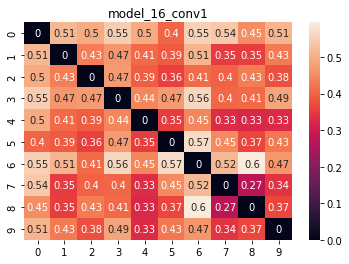

model_16_conv2
(1280, 10)


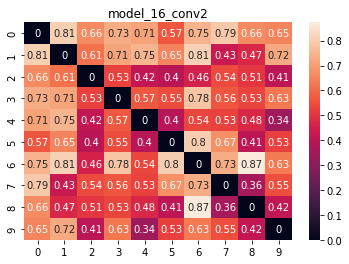

model_17_conv1
(5760, 10)


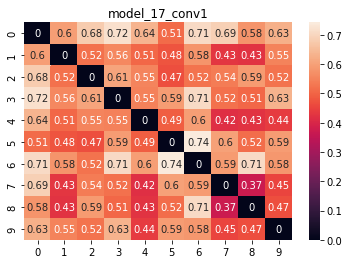

model_17_conv2
(1280, 10)


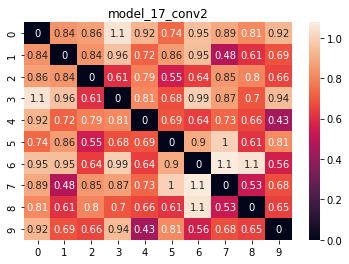

model_18_conv1
(5760, 10)


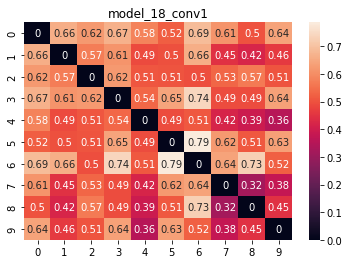

model_18_conv2
(1280, 10)


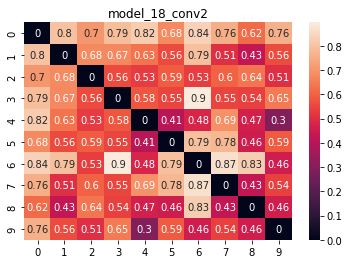

model_19_conv1
(5760, 10)


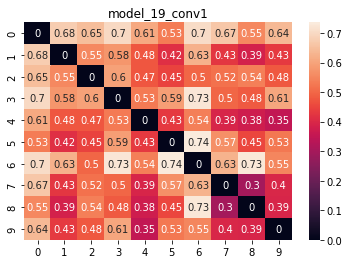

model_19_conv2
(1280, 10)


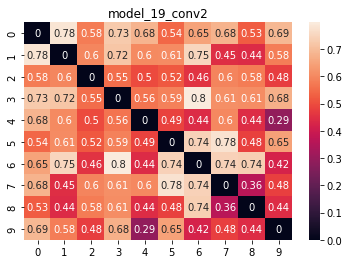

In [38]:
#model rdms for conv1+conv2
models = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
layers = ['conv1', 'conv2']
for model in models:
  model = 'model_'+ model
  for layer in layers:
    print(model +"_" + layer)
    activation_layer = torch.load('/content/gdrive/MyDrive/BIA/models_layers/'+model+'/'+layer+'.pth')
    #print(activation_layer.size())
    activation_layer = activation_layer.permute(3,2,1,0)
    activ = np.asarray(activation_layer).squeeze()
    #print(np.shape(activ))
    activ = activ.reshape(np.shape(activ)[0]*np.shape(activ)[1]*np.shape(activ)[2], 10)
    print(np.shape(activ))
    show_activation_layer_rdm(activ, model, layer)
    



model_0_fc1
(50, 10)


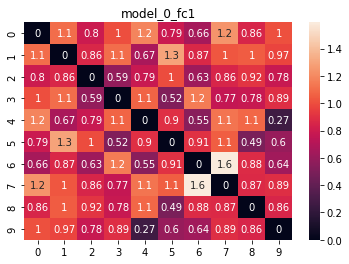

model_0_fc2
(10, 10)


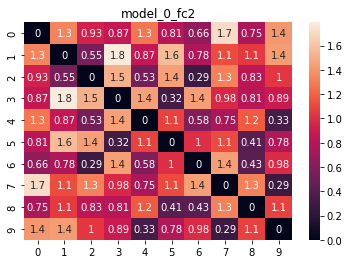

model_1_fc1
(50, 10)


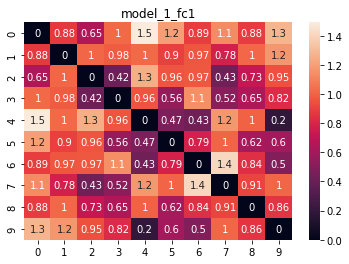

model_1_fc2
(10, 10)


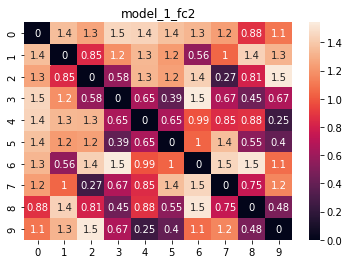

model_2_fc1
(50, 10)


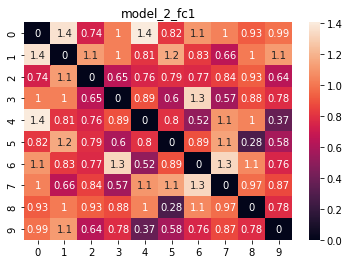

model_2_fc2
(10, 10)


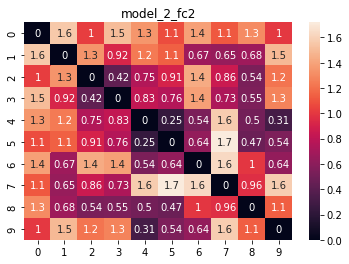

model_3_fc1
(50, 10)


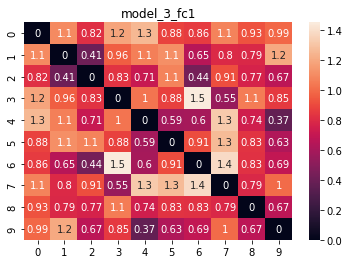

model_3_fc2
(10, 10)


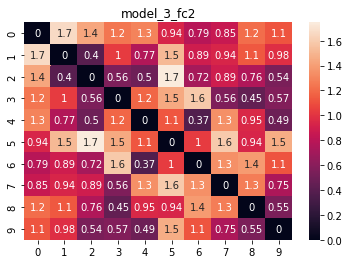

model_4_fc1
(50, 10)


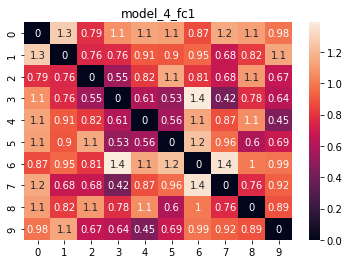

model_4_fc2
(10, 10)


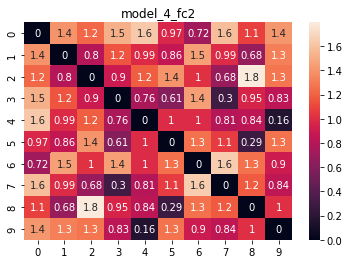

model_5_fc1
(50, 10)


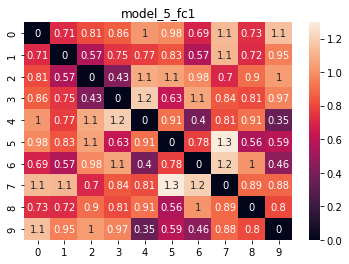

model_5_fc2
(10, 10)


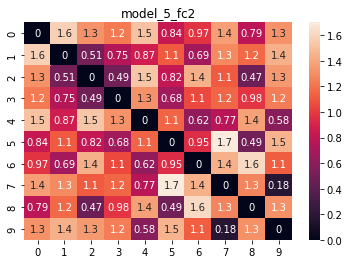

model_6_fc1
(50, 10)


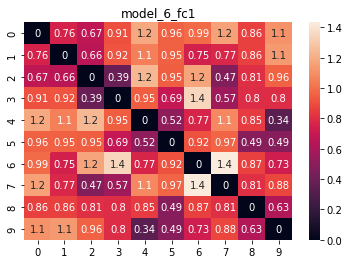

model_6_fc2
(10, 10)


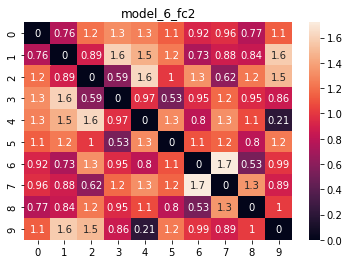

model_7_fc1
(50, 10)


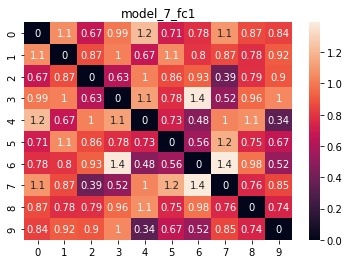

model_7_fc2
(10, 10)


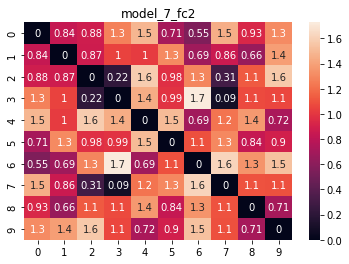

model_8_fc1
(50, 10)


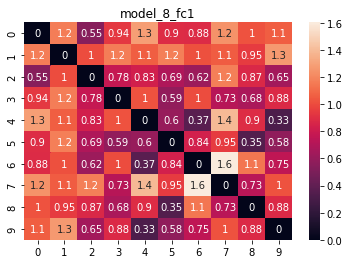

model_8_fc2
(10, 10)


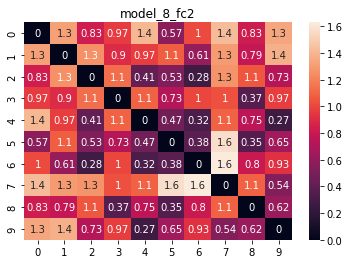

model_9_fc1
(50, 10)


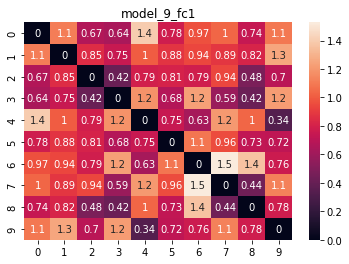

model_9_fc2
(10, 10)


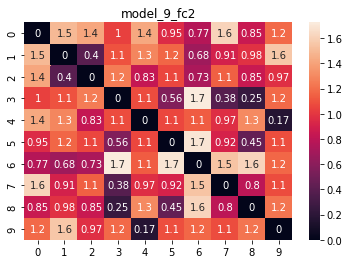

model_10_fc1
(50, 10)


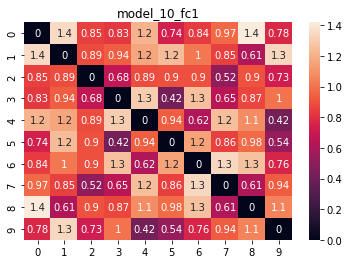

model_10_fc2
(10, 10)


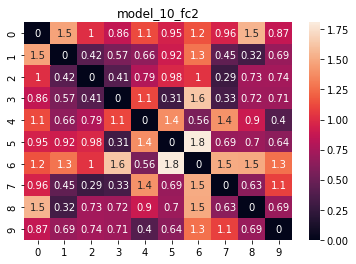

model_11_fc1
(50, 10)


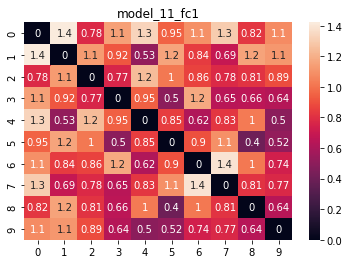

model_11_fc2
(10, 10)


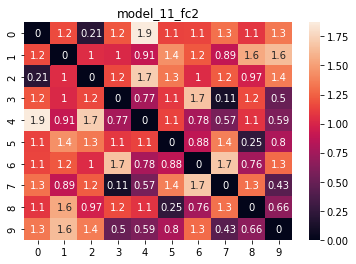

model_12_fc1
(50, 10)


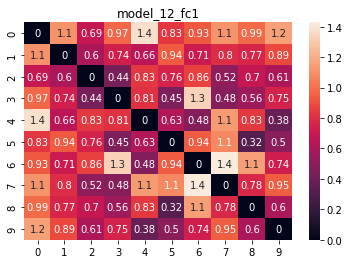

model_12_fc2
(10, 10)


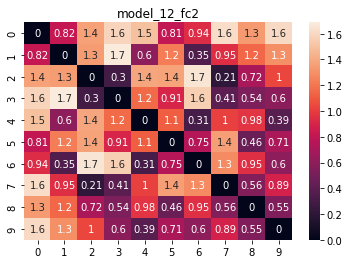

model_13_fc1
(50, 10)


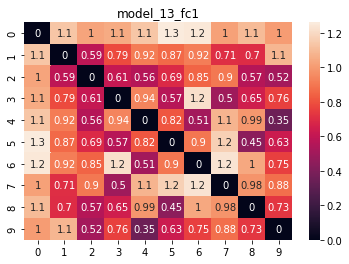

model_13_fc2
(10, 10)


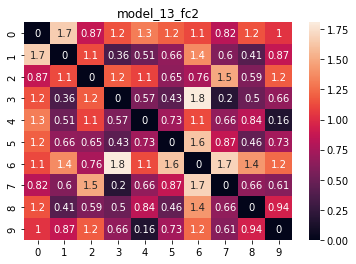

model_14_fc1
(50, 10)


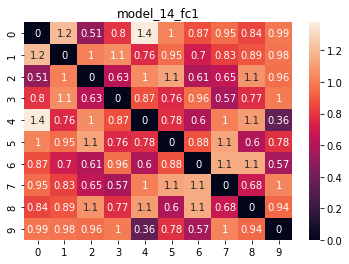

model_14_fc2
(10, 10)


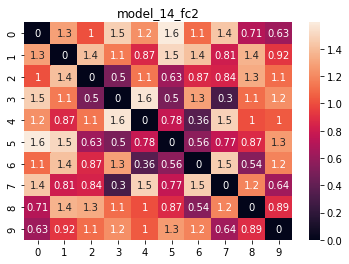

model_15_fc1
(50, 10)


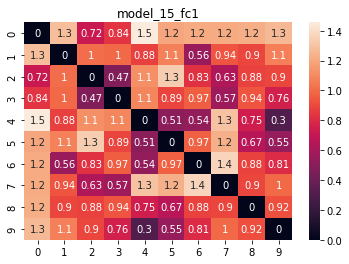

model_15_fc2
(10, 10)


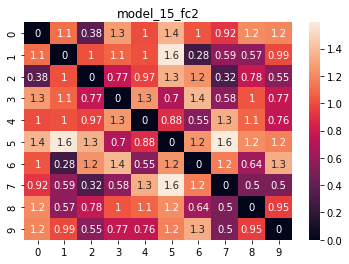

model_16_fc1
(50, 10)


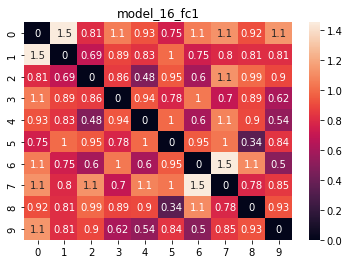

model_16_fc2
(10, 10)


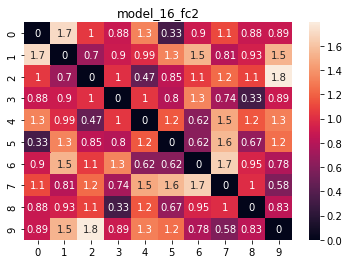

model_17_fc1
(50, 10)


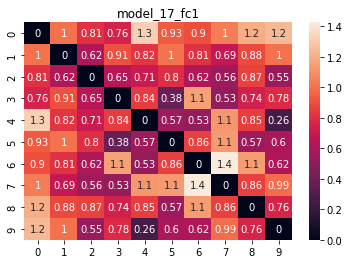

model_17_fc2
(10, 10)


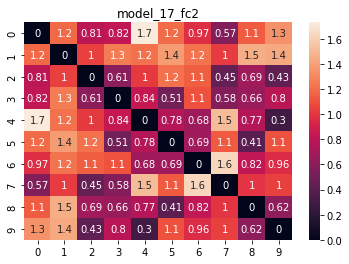

model_18_fc1
(50, 10)


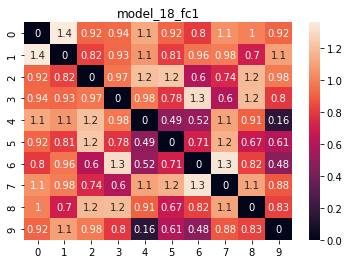

model_18_fc2
(10, 10)


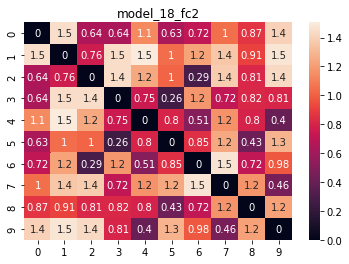

model_19_fc1
(50, 10)


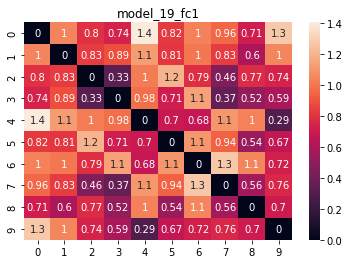

model_19_fc2
(10, 10)


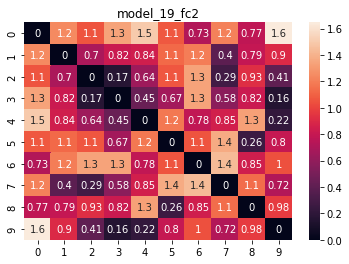

In [39]:
#model rdms for fc1+fc2
models = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
layers = ['fc1', 'fc2']
for model in models:
  model = 'model_'+ model
  for layer in layers:
    print(model+"_"+layer)
    activation_layer = torch.load('/content/gdrive/MyDrive/BIA/models_layers/'+model+'/'+layer+'.pth')
    #print(activation_layer.size())
    activation_layer = activation_layer.permute(2,1,0)
    activ = np.asarray(activation_layer).squeeze()
    print(np.shape(activ))
    show_activation_layer_rdm(activ, model, layer)

participant_0
(100, 10)


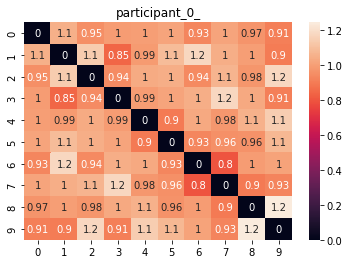

participant_1
(100, 10)


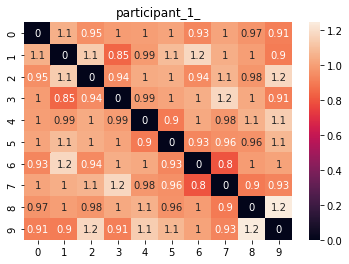

participant_2
(100, 10)


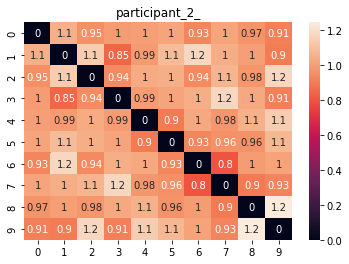

participant_3
(100, 10)


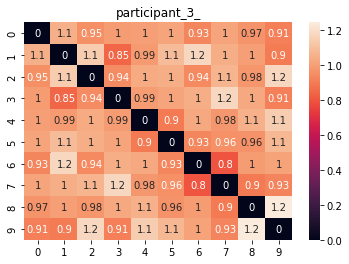

participant_4
(100, 10)


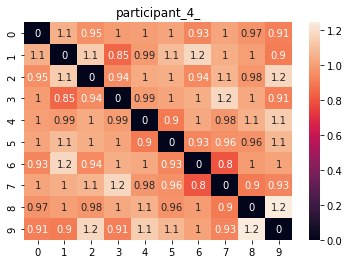

participant_5
(100, 10)


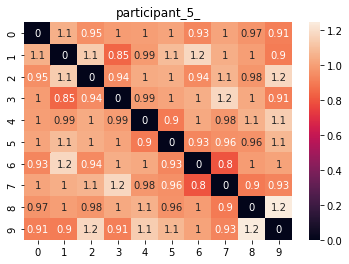

participant_6
(100, 10)


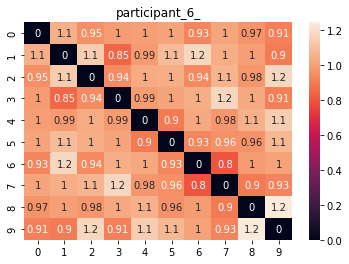

participant_7
(100, 10)


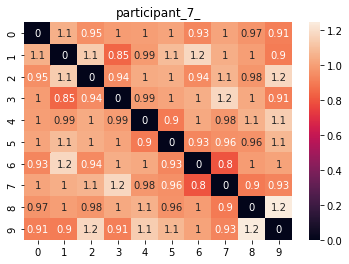

participant_8
(100, 10)


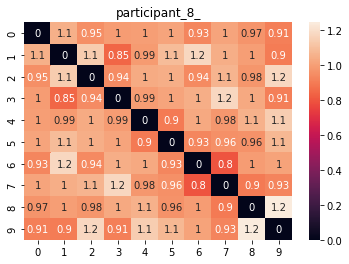

participant_9
(100, 10)


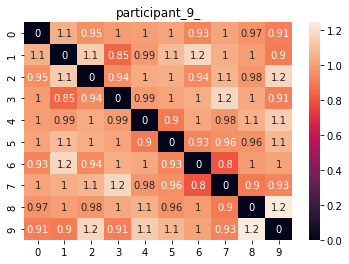

In [40]:
#fmri rdms
subjects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for subject in subjects:
  subject = 'participant_'+subject
  print(subject)
  fmri_activation = torch.load('/content/gdrive/MyDrive/BIA/fmri_tensors/'+subject+'.pth')
  activ = np.asarray(fmri_activation)
  print(np.shape(activ))
  show_activation_layer_rdm(activ, subject, '')